In [2]:
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.6 MB/s eta 0:00:002.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.4 MB/s eta 0:00:000:00:010:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 3.3 MB/s eta 0:00:00m eta 0:00:0136m0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 KB 3.8 MB/s eta 0:00:003.6 MB/s eta 0:00:01


In [19]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


In [7]:
# # p=4,d=0(as difference =0),q=1
%store -r data

 #lets fit our model

model=ARIMA(data["wind_generation_actual"],order=(4,0,1))
model_fit=model.fit()
print(model_fit.summary())



                                 SARIMAX Results                                  
Dep. Variable:     wind_generation_actual   No. Observations:                 1827
Model:                     ARIMA(4, 0, 1)   Log Likelihood              -24163.891
Date:                    Fri, 12 Aug 2022   AIC                          48341.781
Time:                            23:28:18   BIC                          48380.354
Sample:                                 0   HQIC                         48356.009
                                   - 1827                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.672e+05    5.2e-09   5.14e+13      0.000    2.67e+05    2.67e+05
ar.L1          1.6831      0.026     63.811      0.000       1.631       1.735
ar.L2         -0.822

# ARIMAX

In [12]:
%store -r data_x 
train = data[data.year < 2019]
valid = data[data.year >= 2019]

features = data_x.columns
arimaxmodel = auto_arima(train[features[1]],
                   exogenous = train[features], trace=True, 
                   error_action="ignore", suppress_warnings=True)
arimaxmodel.fit(train['wind_generation_actual'], exogenous = train[features])
# model = arima()
arimaxforecast = arimaxmodel.predict(n_periods=len(valid), exogenous = valid[features])
valid["Forecast_ARIMAX"] = arimaxforecast


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-30898.802, Time=4.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-30906.442, Time=2.74 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-30904.741, Time=3.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-30904.826, Time=3.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-30908.442, Time=2.30 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-30902.824, Time=4.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 20.107 seconds


/tmp/ipykernel_280093/2197470574.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Forecast_ARIMAX"] = arimaxforecast


In [13]:
arimaxmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1462
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -14263.463
Date:                Fri, 12 Aug 2022   AIC                          28552.926
Time:                        23:29:51   BIC                          28621.655
Sample:                             0   HQIC                         28578.564
                               - 1462                                         
Covariance Type:                  opg                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
wind_capacity                      -13.2429   1.04e+05     -0.000      1.000   -2.03e+05    2.03e+05
wind_offshore_capacity              12.8508   1.05e+05      0.000      1.000   -2.07e+05    2.07e+05
wind_offshore_generation_actual      1.0003      2.829      0.354      0.724      -4.545       6.545
wind_onshore_capacity               13.2947   1.04e+05      0.000      1.000   -2.04e+05    2.04e+05
wind_onshore_generation_actual       1.0000      0.562      1.779      0.075      -0.101       2.101
temperature                          1.9463   3.75e+04   5.19e-05      1.000   -7.35e+04    7.35e+04
wind_generation_actual_mean_lag2    -0.0001      0.931     -0.000      1.000      -1.824       1.824
wind_generation_actual_mean_lag3     0.0001      1.243      0.000      1.000      -2.436       2.436
wind_generation_actual_mean_lag7 -3.662e-05      2.418  -1.51e-05      1.000      -4.739       4.739
wind_generation_actual_std_lag2   7.703e-05      0.636      0.000      1.000      -1.246       1.246
wind_generation_actual_std_lag3     -0.0001      1.097     -0.000      1.000      -2.150       2.149
wind_generation_actual_std_lag7  -6.362e-05      2.606  -2.44e-05      1.000      -5.109       5.108
sigma2                            4.802e+07      3.899   1.23e+07      0.000     4.8e+07     4.8e+07
===================================================================================
Ljung-Box (L1) (Q):                 359.20   Jarque-Bera (JB):          30875737.15
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.66   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                       715.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.18e+25. Standard errors may be unstable.
"""

<AxesSubplot:>

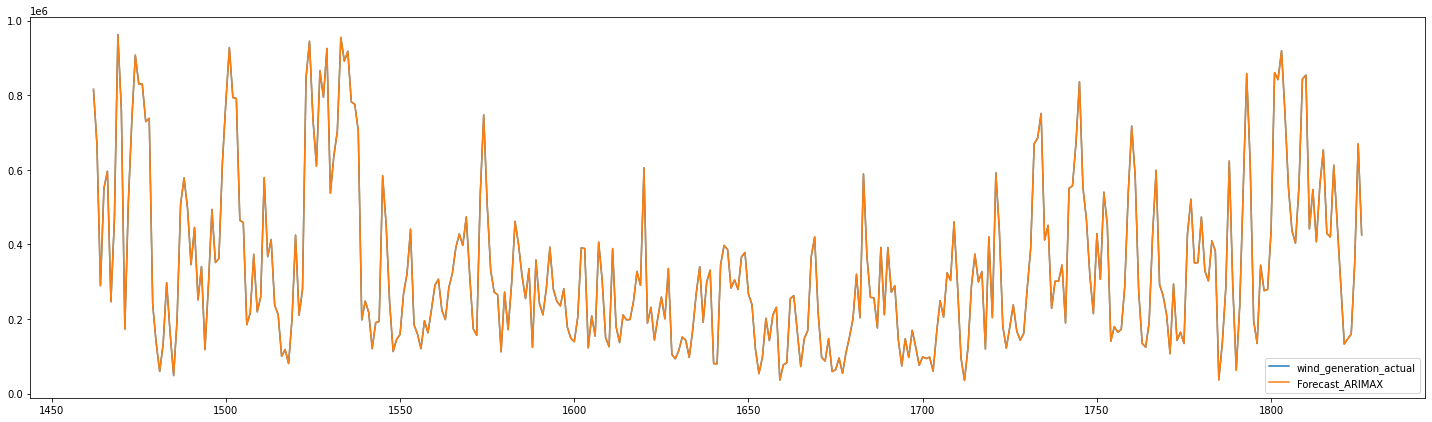

In [14]:
#valid[["wind_generation_actual", "Forecast_ARIMAX"]].plot(figsize=(14, 7))
valid[["wind_generation_actual", "Forecast_ARIMAX"]].plot(figsize=(25, 7))
# plt.figure(figsize=(20,7))

# sns.lineplot(data=valid, x="utc_timestamp",y="wind_generation_actual")
# plt.xlabel("Time")
# plt.ylabel("wind generation actual")
# plt.title("The change wind by the years")


In [17]:
arimax_rmse = np.sqrt(mean_squared_error(valid["wind_generation_actual"], valid.Forecast_ARIMAX))
arimax_mae = mean_absolute_error(valid["wind_generation_actual"], valid.Forecast_ARIMAX)

print("RMSE of Auto ARIMAX:", arimax_rmse)
print("\nMAE of Auto ARIMAX:", arimax_mae)

RMSE of Auto ARIMAX: 109.85047098684821

MAE of Auto ARIMAX: 78.5227346657472


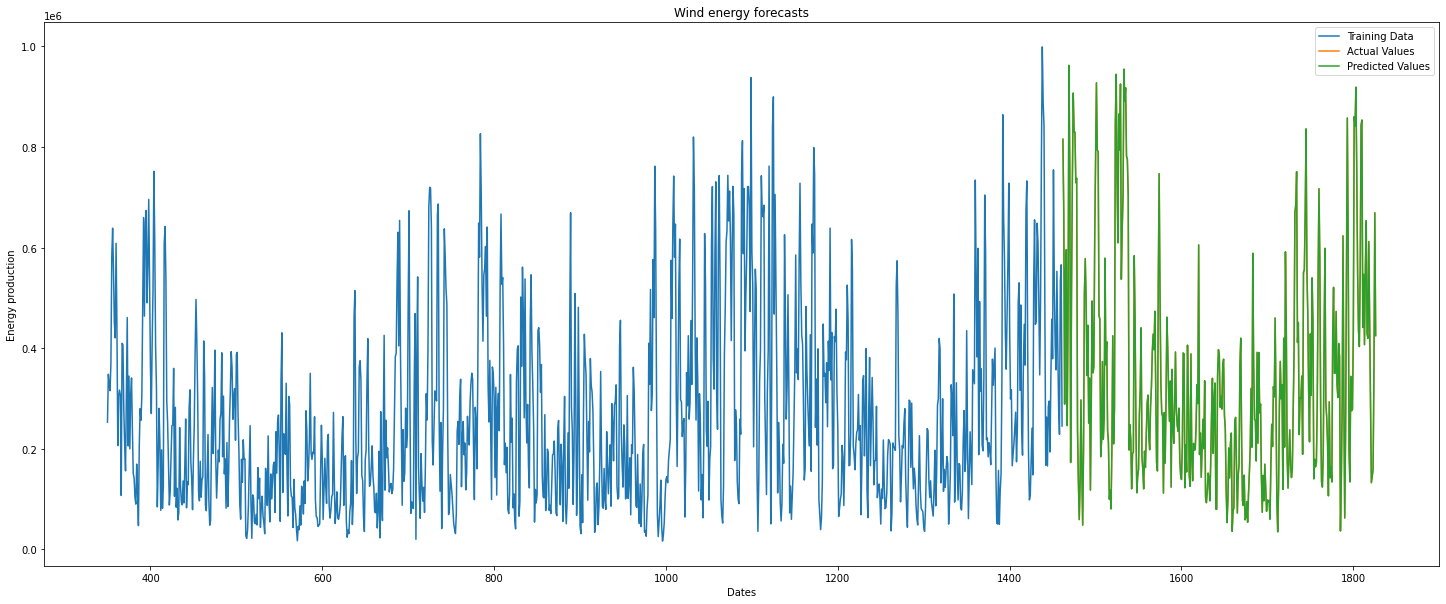

In [21]:
fig, axes = plt.subplots(figsize=(25, 10))

axes.plot(train.iloc[350:,:]["wind_generation_actual"], label='Training Data')
axes.plot(valid.index, valid["wind_generation_actual"], label='Actual Values')
axes.plot(valid.index, arimaxforecast,label='Predicted Values')
axes.set_title('Wind energy forecasts')
axes.set_xlabel('Dates')
axes.set_ylabel('Energy production')
axes.legend()